# Assignment 3
Ilia Kamyshev

## Problem 5 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def obj_func(xk):
    """
    Objective function
    """
    x, y = xk
    return 2 * x ** 4 + 3 * y ** 4 + 2 * x ** 2 + 4 * y ** 2 + x * y - 3 * x - 2 * y


def obj_grad(xk):
    """
    Gradient of the objective function
    """
    x, y = xk
    return np.array([8 * x ** 3 + 4 * x + y - 3, 12 * y ** 3 + 8 * y + x - 2])

In [3]:
def backtrack(xk, fk, gfk, t):
    """
    Backtracking line search algorithm
    """
    assert t > 0, "'t' must be > 0"
    pk = -gfk
    gamma = 0.9
    alpha = 0.1
    while obj_func(xk + t * pk) > fk + alpha * t * np.dot(gfk, pk):
        t = gamma * t
    return t

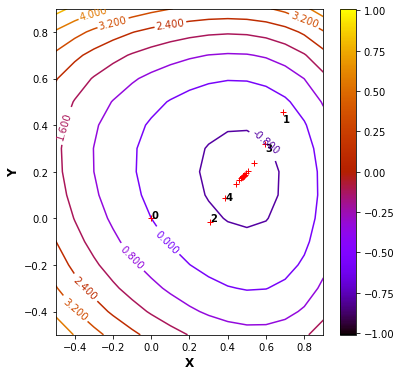


iters = 28
error = 0.0007
min val = -1.0139
x* = [0.4815 0.1809]


In [4]:
# Visualize contour plot of given surface
xy_lim = 1
x_axis = np.arange(-0.5, xy_lim, 0.1)
y_axis = np.arange(-0.5, xy_lim, 0.1)
x_mesh, y_mesh = np.meshgrid(x_axis, y_axis)
surface = obj_func(np.array([x_mesh, y_mesh]))

# Setup colorbar
mappable = plt.cm.ScalarMappable(cmap=plt.cm.gnuplot)
mappable.set_array(surface)
mappable.set_clim(np.min(surface), -np.min(surface))

# Make plot
fig = plt.figure(figsize=(6, 6))
levels = plt.contour(x_mesh, y_mesh, surface, cmap="gnuplot")
plt.clabel(levels)
fig.colorbar(mappable)

# Initial guess
xk = np.array([0, 0])

error = 1e9
k = 0
while error > 1e-3:
    # Store to plot xk point
    prev = xk
    # Plot xk point
    if k < 5:
        plt.text(prev[0], 0.9 * prev[1], k, fontweight="bold")
    plt.plot(prev[0], prev[1], "+", color="red")
    # Value of f at xk
    fk = obj_func(xk)
    # Gradient of f at xk
    gfk = obj_grad(xk)
    # Optimal step-size (argmin f)
    a = backtrack(xk, fk, gfk, 1)
    xk = xk - a * gfk
    error = np.linalg.norm(gfk, ord=2)
    k += 1

# Minimal value on the plot
plt.xlabel("X", fontsize=12, fontweight=900)
plt.ylabel("Y", fontsize=12, fontweight=900)
plt.show()

print("\niters = %d" % k)
print("error = %.4f" % error)
print("min val = %.4f" % obj_func(xk))
print("x* =", np.round(xk, 4))

## Problem 6

In [5]:
def obj_func(xk, hilb):
    """
    Objective function
    """
    return np.dot(np.dot(hilb, xk), xk)


def obj_grad(xk, hilb):
    """
    Gradient of the objective function
    """
    return 2 * np.dot(xk, hilb)

In [6]:
n = 5
_i = np.arange(1, n + 1)
_j = np.arange(1, n + 1)
i, j = np.meshgrid(_i, _j)
# Hilbert matrix
hilb = 1 / (i + j - 1)
print(hilb)

[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]


In [7]:
# Lipschitz constant
lipschitz = 2 * np.linalg.norm(hilb, ord=2)

In [8]:
# Initial guess
x0 = np.array([1, 1, 2, 3, 5])
tolerance = 1e-4

## Constant step-size

In [9]:
xk = x0

# Initial error
error = 1e9
k = 0
# For convergence plot
errors1 = []
while error > tolerance:
    # Gradient of f at xk
    gfk = obj_grad(xk, hilb)
    tk = 1 / lipschitz
    xk = xk - tk * gfk

    error = np.linalg.norm(gfk, ord=2)
    errors1.append(error)

    k += 1

print("\niters = %d" % k)
print("error = %.4f" % error)
print("min val = %.4f" % obj_func(xk, hilb))
print("x* =\n", np.round(xk, 4))
k1 = k


iters = 9952
error = 0.0001
min val = 0.0000
x* =
 [-0.0048  0.0156  0.1297 -0.3998  0.2685]


## Backtracking algorithm (Armijo)

In [10]:
def backtrack(xk, fk, gfk, t, hilb):
    """
    Backtracking line search algorithm
    """
    assert t > 0, "'t' must be > 0"
    pk = -gfk
    gamma = 0.9
    alpha = 0.3
    while obj_func(xk + t * pk, hilb) > fk + alpha * t * np.dot(gfk, pk):
        t = gamma * t
    return t

In [11]:
xk = x0
error = 1e9
k = 0
errors2 = []
while error > tolerance:
    # Value of f at xk
    fk = obj_func(xk, hilb).item()
    # Gradient of f at xk
    gfk = obj_grad(xk, hilb)
    # Optimal step-size
    tk = backtrack(xk, fk, gfk, 1, hilb)
    xk = xk - tk * gfk

    error = np.linalg.norm(gfk, ord=2)
    errors2.append(error)

    k += 1

print("\niters = %d" % k)
print("error = %.4f" % error)
print("min val = %.4f" % obj_func(xk, hilb))
print("x* =\n", np.round(xk, 4))
k2 = k


iters = 6161
error = 0.0001
min val = 0.0000
x* =
 [-0.0019 -0.0105  0.1692 -0.3838  0.2335]


## Steepest-descend 

In [12]:
# Initial guess
xk = x0

error = 1e9
k = 0
errors3 = []
while error > tolerance:
    # Gradient of f at xk
    gfk = obj_grad(xk, hilb)
    # Optimal step-size (argmin f)
    tk = 0.5 * np.linalg.norm(gfk, ord=2) ** 2 / np.dot(np.dot(hilb, gfk), gfk)
    xk = xk - tk * gfk

    error = np.linalg.norm(gfk, ord=2)
    errors3.append(error)

    k += 1

print("\niters = %d" % k)
print("error = %.4f" % error)
print("min val = %.4f" % obj_func(xk, hilb))
print("x* =\n", np.round(xk, 4))
k3 = k


iters = 2338
error = 0.0001
min val = 0.0000
x* =
 [-0.0042  0.0108  0.1371 -0.3969  0.262 ]


## Conjugate Gradient

In [13]:
# Initial guess
k = 0
xk = x0

error = 1e9
errors4 = []
while error > tolerance:
    if k == 0:
        r = -obj_grad(hilb, xk) / 2
        p = r

    tk = np.linalg.norm(r, ord=2) ** 2 / np.dot(np.dot(hilb, p), r)
    xk = xk + tk * p
    _r = r
    r = r - tk * np.dot(hilb, p)
    bk = np.dot(r, r) / np.dot(_r, _r)
    p = r + bk * p

    k += 1
    error = np.linalg.norm(r, ord=2)
    errors4.append(error)

print("\niters = %d" % k)
print("error = %.4f" % error)
print("min val = %.4f" % obj_func(xk, hilb))
print("x* =\n", np.round(xk, 4))
k4 = k


iters = 4
error = 0.0000
min val = 0.0000
x* =
 [ 0.0029 -0.0556  0.241  -0.3653  0.1791]


## Heavy Ball 

In [14]:
def heavy_ball(xk, tolerance, hilb, lipschitz, bk, alpha):
    x = [xk, xk]

    k = 1
    error = 1e9
    errors5 = []
    while error > tolerance:
        xk = x[-1]
        _xk = x[-2]

        gfk = obj_grad(xk, hilb)
        tk = alpha * 2 * (1 + bk) / lipschitz

        xk = xk - tk * gfk + bk * (xk - _xk)
        x.append(xk)

        error = np.linalg.norm(gfk, ord=2)
        errors5.append(error)

        k += 1

    return xk, k - 1, errors5

In [15]:
search = {}
for ak in np.linspace(0.5, 0.9, 15):
    for bk in np.linspace(0, 0.99, 30):
        xk, k, errors5 = heavy_ball(x0, tolerance, hilb, lipschitz, bk, ak)
        search.update({k: [xk, bk, ak, errors5]})

min_k = min(list(search.keys()))
xk = search[min_k][0]
bk = search[min_k][1]
ak = search[min_k][2]
errors5 = search[min_k][3]
print("\niters = %d" % min_k)
print("error = %.4f" % errors5[-1])
print("min val = %.4f" % obj_func(xk, hilb))
print("x* =\n", np.round(xk, 4))
print("\nOptimal bk =", np.round(bk, 4))
print("Optimal ak=", np.round(ak, 4))
print("Optimal tk =", np.round(ak * 2 * (1 + bk) / lipschitz, 4))
k5 = min_k


iters = 251
error = 0.0001
min val = 0.0000
x* =
 [-0.0037  0.0072  0.143  -0.3954  0.2578]

Optimal bk = 0.9217
Optimal ak= 0.8143
Optimal tk = 0.9986


## Fast Gradient 

In [16]:
# Initial guess
k = 1
xk = x0
vk = xk
thetak = 1
tk = 1 / lipschitz

error = 1e9
errors6 = []
while error > tolerance:
    _thetak = thetak
    for thetak in np.linspace(0.01, 0.99, 100):
        if (1 - thetak) / thetak ** 2 <= 1 / _thetak ** 2:
            break

    _xk = xk
    y = (1 - thetak) * xk + thetak * vk
    gfk = obj_grad(y, hilb)
    xk = y - tk * gfk
    vk = _xk + 1 / thetak * (xk - _xk)

    k += 1

    error = np.linalg.norm(gfk, ord=2)
    errors6.append(error)


print("\niters = %d" % (k - 1))
print("error = %.4f" % error)
print("min val = %.4f" % obj_func(xk, hilb))
print("x* =\n", np.round(xk, 4))
k6 = k - 1


iters = 1381
error = 0.0001
min val = 0.0000
x* =
 [-0.0048  0.0156  0.1298 -0.3998  0.2684]


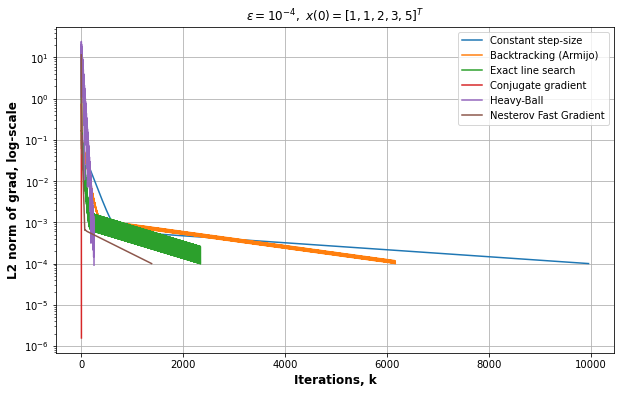

In [17]:
plt.figure(figsize=(10, 6))
plt.yscale("log")
plt.plot(np.arange(k1), errors1, label="Constant step-size")
plt.plot(np.arange(k2), errors2, label="Backtracking (Armijo)")
plt.plot(np.arange(k3), errors3, label="Exact line search")
plt.plot(np.arange(k4), errors4, label="Conjugate gradient")
plt.plot(np.arange(k5), errors5, label="Heavy-Ball")
plt.plot(np.arange(k6), errors6, label="Nesterov Fast Gradient")
plt.legend()
plt.title(r"$\epsilon=10^{-4},\ x(0)=[1,1,2,3,5]^T$", fontweight="700", fontsize=12)
plt.xlabel("Iterations, k", fontweight="700", fontsize=12)
plt.ylabel("L2 norm of grad, log-scale", fontweight="700", fontsize=12)
plt.grid()
plt.show()